In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [8]:
pip install pandas openpyxl


Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd

# Đọc tệp Excel
df = pd.read_excel('Data AI.xlsx', engine='openpyxl')

# Hiển thị một số dòng đầu tiên của dữ liệu
df.head()


,STT,category,rating,label,text_
0,1,Home_and_Kitchen_5,5,CG,"Yêu thật sự! Làm rất chắc chắn, bền và cực kỳ ..."
1,2,Home_and_Kitchen_5,5,CG,"Rất đẹp, mình mê luôn, là một bản nâng cấp tuy..."
2,3,Home_and_Kitchen_5,5,CG,Cái gối này đã cứu sống lưng tôi. Tôi rất thíc...
3,4,Home_and_Kitchen_5,1,CG,"Thiếu hướng dẫn sử dụng, nhưng với mức giá này..."
4,5,Home_and_Kitchen_5,5,CG,Bộ này rất đẹp. Chất lượng tốt. Gia đình tôi đ...


In [10]:
df.isnull().sum()

STT         0
category    0
rating      0
label       0
text_       1
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STT       4998 non-null   int64 
 1   category  4998 non-null   object
 2   rating    4998 non-null   int64 
 3   label     4998 non-null   object
 4   text_     4997 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


In [12]:
df.describe()

,STT,rating
count,4998.000000,4998.000000
mean,2499.500000,4.400760
std,1442.942653,1.107426
min,1.000000,1.000000
25%,1250.250000,4.000000
50%,2499.500000,5.000000
75%,3748.750000,5.000000
max,4998.000000,5.000000


In [13]:
df['rating'].value_counts()

5    3506
4     688
3     367
1     262
2     175
Name: rating, dtype: int64

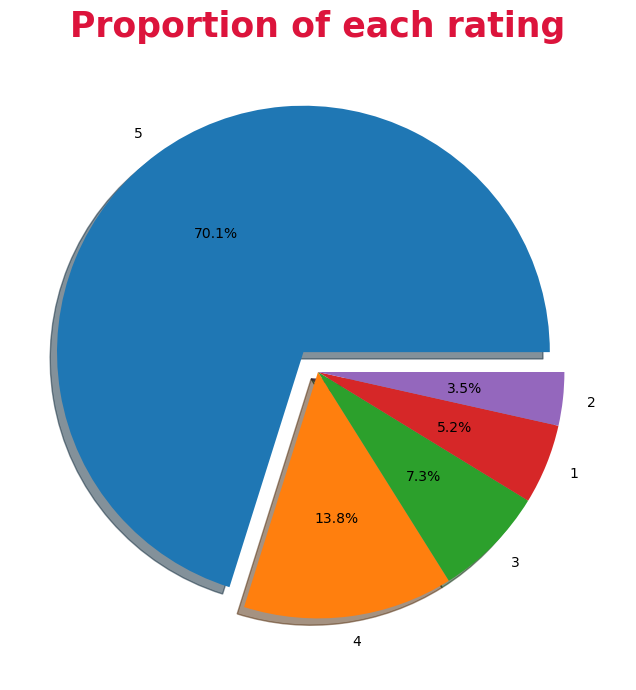

In [14]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [15]:
pip install underthesea

Note: you may need to restart the kernel to use updated packages.


In [16]:
from underthesea import word_tokenize

# Hàm tách từ sử dụng underthesea
def tokenize_text(text):
    # Kiểm tra xem text có phải là chuỗi hay không, nếu không trả về chuỗi rỗng
    if not isinstance(text, str):
        return ""
    
    # Tách từ sử dụng thư viện underthesea
    words = word_tokenize(text)
    return words

# Áp dụng hàm 'tokenize_text' cho toàn bộ cột 'text_'
df['tokenized_text'] = df['text_'].apply(tokenize_text)

# Hiển thị kết quả tách từ
df[['text_', 'tokenized_text']].head()


,text_,tokenized_text
0,"Yêu thật sự! Làm rất chắc chắn, bền và cực kỳ ...","[Yêu, thật sự, ! Làm, rất, chắc chắn, ,, bền, ..."
1,"Rất đẹp, mình mê luôn, là một bản nâng cấp tuy...","[Rất, đẹp, ,, mình, mê, luôn, ,, là, một, bản,..."
2,Cái gối này đã cứu sống lưng tôi. Tôi rất thíc...,"[Cái, gối, này, đã, cứu, sống lưng, tôi, ., Tô..."
3,"Thiếu hướng dẫn sử dụng, nhưng với mức giá này...","[Thiếu, hướng dẫn, sử dụng, ,, nhưng, với, mức..."
4,Bộ này rất đẹp. Chất lượng tốt. Gia đình tôi đ...,"[Bộ, này, rất, đẹp, ., Chất lượng, tốt, ., Gia..."


In [17]:
import pandas as pd

# Thiết lập pandas để hiển thị toàn bộ dữ liệu
pd.set_option('display.max_rows', None)

# Hiển thị toàn bộ kết quả
print(df[['text_', 'tokenized_text']])


                                                  text_  \
0     Yêu thật sự! Làm rất chắc chắn, bền và cực kỳ ...   
1     Rất đẹp, mình mê luôn, là một bản nâng cấp tuy...   
2     Cái gối này đã cứu sống lưng tôi. Tôi rất thíc...   
3     Thiếu hướng dẫn sử dụng, nhưng với mức giá này...   
4     Bộ này rất đẹp. Chất lượng tốt. Gia đình tôi đ...   
5     Tôi muốn có nhiều hương vị khác nhau nhưng lại...   
6     Chúng là điểm nhấn hoàn hảo với tôi, chỉ ước c...   
7     Những cái này vừa khít và nhìn rất ổn. Tôi thí...   
8     Số lớn dễ nhìn, điều duy nhất tôi không thích ...   
9     Con trai tôi rất thích chăn này, chất lượng cũ...   
10    Đúng như quảng cáo. Đây là cái thứ năm tôi đã ...   
11    Rất tiện lợi với một đứa con của tôi, và bộ dụ...   
12    Có ai nói “phong cách Á Đông chỉ 60 đô chưa”? ...   
13    Những món này quá mỏng manh! Không đạt chất lư...   
14    Pha trà không cần khuấy. Vấn đề là hơi khó để ...   
15    Cực kỳ dễ thương! Giá cũng rất tốt. Gia đình m... 

In [18]:
# Lưu kết quả tách từ vào file CSV
df[['text_', 'tokenized_text']].to_csv('tokenized_text_output.csv', index=False)

In [19]:
import pandas as pd

# Đọc danh sách stopwords từ file
with open('vietnamese-stopwords.txt', 'r', encoding='utf-8') as f:
    vietnamese_stopwords = f.read().splitlines()  # Đọc các dòng trong file và lưu vào danh sách

# Hàm xử lý stopwords
def remove_stopwords(words):
    # Loại bỏ stopwords từ danh sách
    return [word for word in words if word.lower() not in vietnamese_stopwords]

# Áp dụng hàm 'remove_stopwords' cho toàn bộ cột 'tokenized_text'
df['cleaned_text'] = df['tokenized_text'].apply(remove_stopwords)

# Hiển thị kết quả sau khi xử lý stopwords
df[['text_', 'cleaned_text']].head()

,text_,cleaned_text
0,"Yêu thật sự! Làm rất chắc chắn, bền và cực kỳ ...","[Yêu, ! Làm, ,, bền, cực kỳ, thoải mái, ., cực..."
1,"Rất đẹp, mình mê luôn, là một bản nâng cấp tuy...","[đẹp, ,, mê, ,, nâng cấp, tuyệt vời, phiên bản..."
2,Cái gối này đã cứu sống lưng tôi. Tôi rất thíc...,"[gối, cứu, sống lưng, ., cảm giác, kiểu dáng, .]"
3,"Thiếu hướng dẫn sử dụng, nhưng với mức giá này...","[hướng dẫn, ,, giá, sản phẩm, tuyệt vời, !]"
4,Bộ này rất đẹp. Chất lượng tốt. Gia đình tôi đ...,"[đẹp, ., Chất lượng, ., Gia đình, hai, .]"


In [20]:
# Lưu kết quả stopword vào file CSV
df[['text_', 'cleaned_text']].to_csv('cleaned_text_output.csv', index=False)


In [21]:
pip install gensim


Note: you may need to restart the kernel to use updated packages.


In [22]:
from gensim.models import Word2Vec

# Giả sử bạn đã xử lý stopwords và có cột 'cleaned_text' chứa các câu đã tách từ và loại bỏ stopwords
tokenized_texts = df['cleaned_text'].tolist()  # Danh sách các câu, mỗi câu là một danh sách các từ

# Đào tạo mô hình Word2Vec
model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, sg=0)

# Lưu mô hình đã huấn luyện
model.save("word2vec.model")


In [23]:
import numpy as np

# Hàm chuyển mỗi câu thành vector bằng cách lấy trung bình các vector từ trong câu
def sentence_to_vec(sentence, model):
    # Kiểm tra nếu sentence là danh sách các từ (tokenized text)
    if not isinstance(sentence, list):
        sentence = sentence.split()  # Tách từ nếu là chuỗi

    # Lấy các từ trong câu và lấy vector của chúng
    words = [word for word in sentence if word in model.wv]  # Đảm bảo chỉ lấy từ có trong mô hình
    if len(words) == 0:
        return np.zeros(model.vector_size)  # Nếu không có từ nào trong mô hình, trả về vector 0
    return np.mean([model.wv[word] for word in words], axis=0)

# Chuyển toàn bộ dữ liệu (5 nghìn đánh giá) thành vector
vectors = np.array([sentence_to_vec(sentence, model) for sentence in df['cleaned_text']])

# Kiểm tra kích thước của mảng vectors
print(vectors.shape)


(4998, 100)


In [24]:
# Tạo DataFrame từ các vector (mỗi dòng là một vector từ một đánh giá)
vectors_df = pd.DataFrame(vectors)

# Lưu các vector vào tệp CSV
vectors_df.to_csv('review_vectors.csv', index=False)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Dữ liệu đầu vào: Các vector của các câu
X = vectors
# Nhãn phân loại (fake/real)
y = df['label']

# Chia dữ liệu thành train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.632


In [26]:
import joblib

# Lưu mô hình phân loại
joblib.dump(clf, 'fake_review_classifier.pkl')


['fake_review_classifier.pkl']

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình SVM
svm_model = SVC(kernel='linear', random_state=42)

# Huấn luyện mô hình SVM
svm_model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Hiển thị độ chính xác của mô hình SVM
print("Accuracy của mô hình SVM:", accuracy_svm)


Accuracy của mô hình SVM: 0.603


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Định nghĩa tham số mà bạn muốn tối ưu
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Khởi tạo mô hình SVM
svm_model = SVC(random_state=42)

# Tối ưu tham số bằng GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Huấn luyện mô hình với GridSearchCV
grid_search.fit(X_train, y_train)

# In ra tham số tối ưu
print("Best parameters:", grid_search.best_params_)

# Dự đoán với mô hình tối ưu
y_pred_svm_optimized = grid_search.predict(X_test)

# Đánh giá độ chính xác
from sklearn.metrics import accuracy_score
print("Optimized SVM Accuracy:", accuracy_score(y_test, y_pred_svm_optimized))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Optimized SVM Accuracy: 0.675


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_model = SVC(random_state=42)
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


In [30]:
import joblib
joblib.dump(grid_search.best_estimator_, "svm_model.pkl")
print("✅ SVM model saved as 'svm_model.pkl'")


✅ SVM model saved as 'svm_model.pkl'


In [31]:
import joblib

# Load mô hình đã lưu
svm_model_loaded = joblib.load("svm_model.pkl")

# Dùng mô hình dự đoán
y_pred = svm_model_loaded.predict(X_test)


In [32]:
import os
print("Thư mục làm việc hiện tại:", os.getcwd())

# Nếu file không nằm trong thư mục làm việc này, bạn có thể thay đổi hoặc sử dụng đường dẫn đầy đủ
svm_model_loaded = joblib.load("svm_model.pkl")


Thư mục làm việc hiện tại: C:\Users\LAPTOP\AI - Trí tuệ nhân tạo


In [26]:
import numpy as np

# Hàm chuyển mỗi câu thành vector bằng cách lấy trung bình các vector từ trong câu
def sentence_to_vec(sentence, model):
    # Lấy các từ trong câu và lấy vector của chúng
    words = [word for word in sentence if word in model.wv]  # Đảm bảo chỉ lấy từ có trong mô hình
    if len(words) == 0:
        return np.zeros(model.vector_size)  # Nếu không có từ nào trong mô hình, trả về vector 0
    return np.mean([model.wv[word] for word in words], axis=0)

# Giả sử bạn đã huấn luyện mô hình SVM và tối ưu tham số với GridSearchCV, và bạn đã có mô hình Word2Vec (model)
# Giả sử câu review mới
new_review = "Sản phẩm này rất tuyệt vời, tôi rất thích!"

# Tiền xử lý và chuyển câu mới thành vector (giống như bạn đã làm với dữ liệu huấn luyện)
new_review_vector = sentence_to_vec(new_review.split(), model)  # Chuyển câu thành vector bằng Word2Vec

# Dự đoán nhãn cho câu review mới với mô hình SVM đã tối ưu
predicted_label = grid_search.best_estimator_.predict([new_review_vector])

# In ra kết quả dự đoán
print("Dự đoán nhãn:", predicted_label)


Dự đoán nhãn: ['CG']


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.621


In [1]:
import joblib
from gensim.models import Word2Vec

# Giả sử bạn đã có các biến sau (nếu khác tên thì điều chỉnh lại):
# - svm_model: mô hình SVM đã huấn luyện
# - model: mô hình Word2Vec đã huấn luyện

# 1. Lưu mô hình SVM vào file .pkl
joblib.dump(svm_model, "svm_model.pkl")
print("✅ SVM model saved as 'svm_model.pkl'")

# 2. Lưu mô hình Word2Vec (.bin format)
model.wv.save_word2vec_format("word2vec_model.bin", binary=True)
print("✅ Word2Vec model saved as 'word2vec_model.bin'")



NameError: name 'svm_model' is not defined

In [2]:
joblib.dump(grid_search, "svm_grid_search.pkl")
print("✅ GridSearchCV object saved as 'svm_grid_search.pkl'")


NameError: name 'grid_search' is not defined

In [28]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình Logistic Regression
lr_model = LogisticRegression(random_state=42)

# Huấn luyện mô hình
lr_model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.609
